In [90]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [91]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [92]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [93]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [94]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [95]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [96]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [97]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [98]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

<Figure size 2000x400 with 0 Axes>

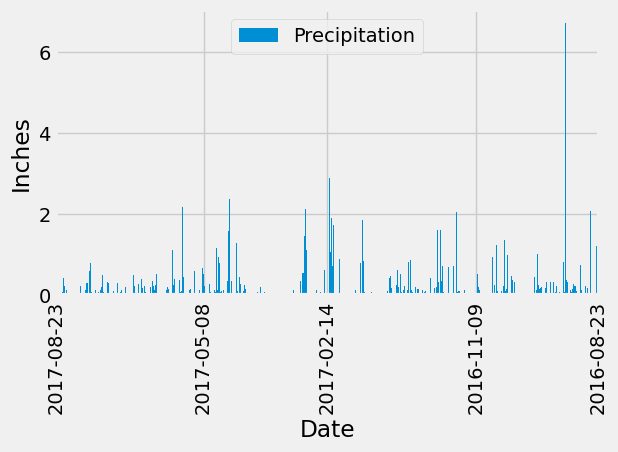

In [99]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
query_date=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

recent_prcp=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=dt.date(2016,8,23)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(recent_prcp,columns=['Date','Precipitation'])
df=df.dropna(how="any")
# Sort the dataframe by date
df=df.sort_values("Date",ascending=False)


# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Date',inplace=True)
plt.figure(figsize=(20,4))
df.plot.bar(align="edge",width=1)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks([0,550,1010,1565,2020],rotation="vertical")
plt.tight_layout()

In [100]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [101]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).group_by(Station.station).count()

9

In [102]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [103]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

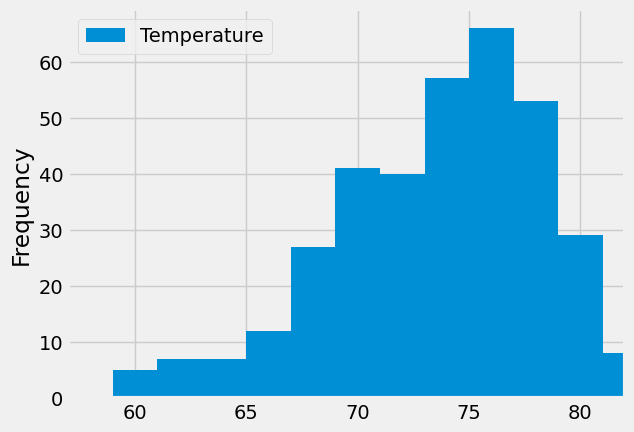

<Figure size 640x480 with 0 Axes>

In [107]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
greatest=session.query(Measurement.tobs,Measurement.date).filter(Measurement.date>=dt.date(2016,8,23)).\
filter(Measurement.station=='USC00519281').all()
greatest_df=pd.DataFrame(greatest,columns=["Temperature","Date"])

#greatest_df.set_index('Temperature',inplace=True)
greatest_df.plot.hist(column='Temperature',bins=12)
plt.xlim(57, 82)
plt.show()
plt.tight_layout()

# Close Session

In [105]:
# Close Session
session.close()